In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import suraj_datalab as sd

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
print(f'Train Shape:\tRows: {train.shape[0]}\tColumns: {train.shape[1]}')
print(f'Test Shape:\tRows: {test.shape[0]}\tColumns: {test.shape[1]}')

Train Shape:	Rows: 165034	Columns: 14
Test Shape:	Rows: 110023	Columns: 13


In [4]:
train.drop(['id', 'CustomerId'], axis=1, inplace=True)

categorical_features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
target = 'Exited'

## Data Description




| Column Name       | Description                                                             |
|-------------------|-------------------------------------------------------------------------|
| Customer ID       | A unique identifier for each customer                                   |
| Surname           | The customer's surname or last name                                     |
| Credit Score      | A numerical value representing the customer's credit score              |
| Geography         | The country where the customer resides (France, Spain, or Germany)      |
| Gender            | The customer's gender (Male or Female)                                  |
| Age               | The customer's age                                                      |
| Tenure            | The number of years the customer has been with the bank                 |
| Balance           | The customer's account balance                                          |
| NumOfProducts     | The number of bank products the customer uses (e.g., savings, credit)   |
| HasCrCard         | Whether the customer has a credit card (1 = yes, 0 = no)                |
| IsActiveMember    | Whether the customer is an active member (1 = yes, 0 = no)              |
| EstimatedSalary   | The estimated salary of the customer                                    |
| Exited            | Whether the customer has churned (1 = yes, 0 = no)                      |



In [5]:
train.Exited.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

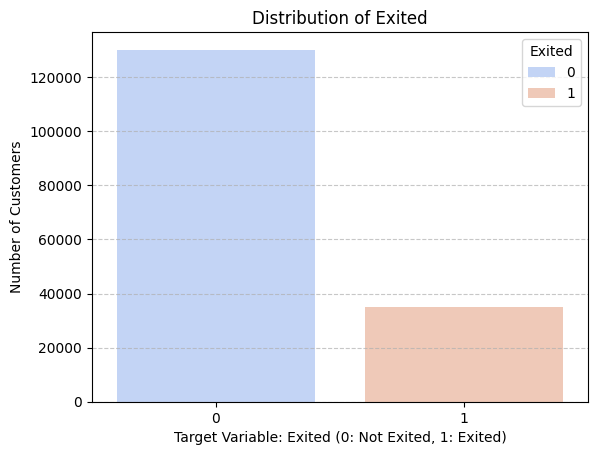

In [6]:
# Plot the distribution of the target variable
sns.countplot(data=train, x='Exited', palette='coolwarm', alpha=0.8, hue='Exited')
plt.title('Distribution of Exited')
plt.xlabel('Target Variable: Exited (0: Not Exited, 1: Exited)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

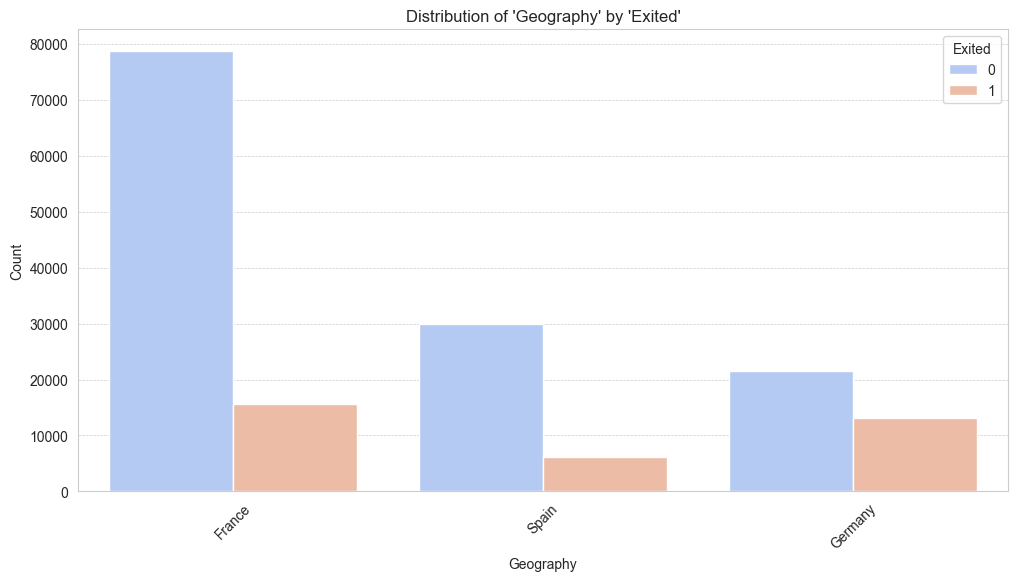

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within Geography (%),1 within Geography (%)
Geography,,,,,,
France,94215,57.088236,47.652605,9.435631,83.471846,16.528154
Spain,36213,21.942751,18.164742,3.778009,82.782426,17.217574
Germany,34606,20.969012,13.022771,7.946241,62.104837,37.895163


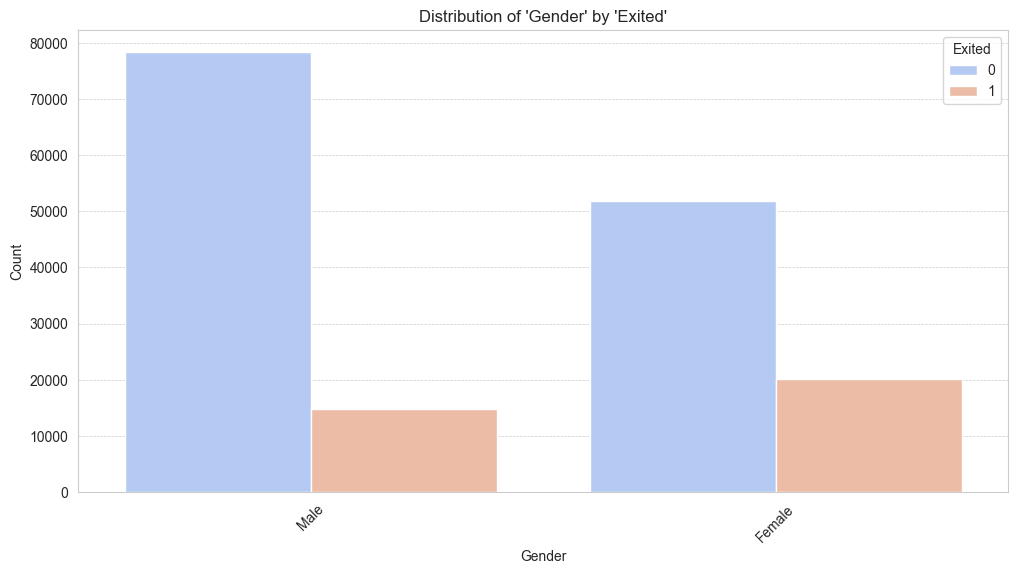

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within Gender (%),1 within Gender (%)
Gender,,,,,,
Male,93150,56.442915,47.465371,8.977544,84.094471,15.905529
Female,71884,43.557085,31.374747,12.182338,72.031328,27.968672


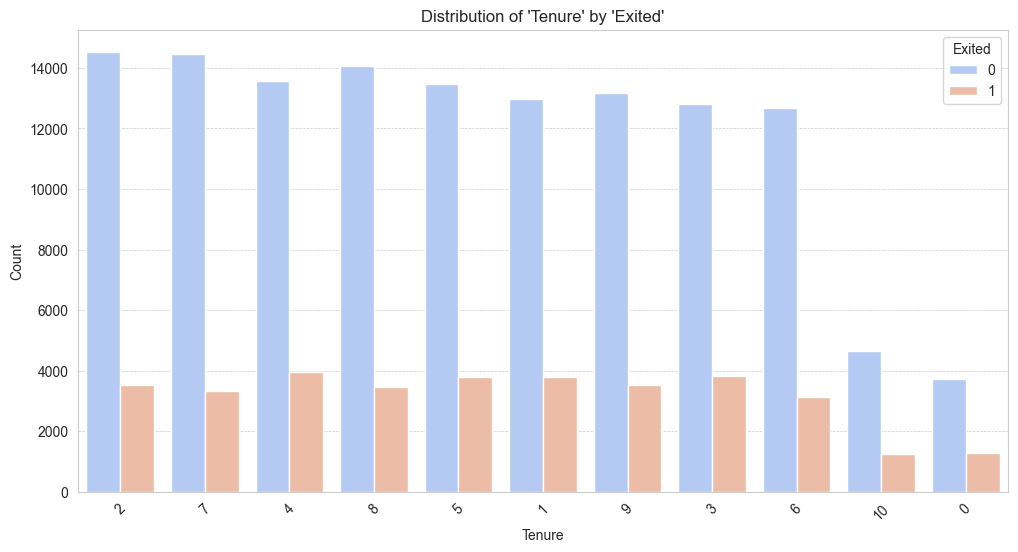

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within Tenure (%),1 within Tenure (%)
Tenure,,,,,,
2,18045,10.934111,8.803640,2.130470,80.515378,19.484622
7,17810,10.791716,8.767284,2.024431,81.240876,18.759124
4,17554,10.636596,8.228607,2.407989,77.361285,22.638715
8,17520,10.615994,8.514609,2.101385,80.205479,19.794521
5,17268,10.463298,8.160743,2.302556,77.993977,22.006023
1,16760,10.155483,7.858987,2.296496,77.386635,22.613365
9,16709,10.124580,7.977144,2.147436,78.789874,21.210126
3,16630,10.076711,7.768096,2.308615,77.089597,22.910403
6,15822,9.587115,7.681447,1.905668,80.122614,19.877386


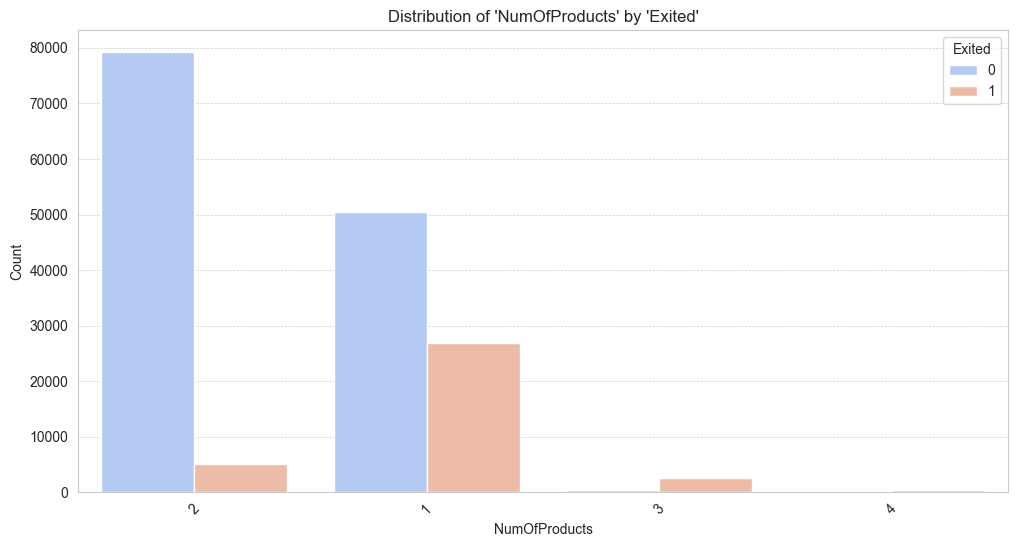

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within NumOfProducts (%),1 within NumOfProducts (%)
NumOfProducts,,,,,,
2,84291,51.074930,47.988899,3.086031,93.957837,6.042163
1,77374,46.883672,30.609450,16.274222,65.288081,34.711919
3,2894,1.753578,0.206018,1.547560,11.748445,88.251555
4,475,0.287819,0.035750,0.252069,12.421053,87.578947


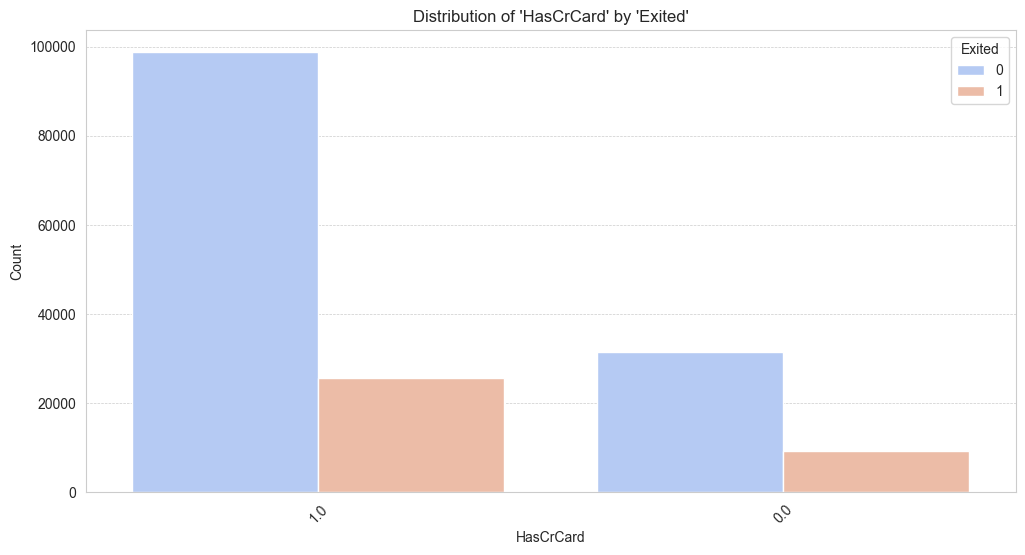

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within HasCrCard (%),1 within HasCrCard (%)
HasCrCard,,,,,,
1.0,124428,75.395373,59.831307,15.564066,79.356736,20.643264
0.0,40606,24.604627,19.008810,5.595817,77.257056,22.742944


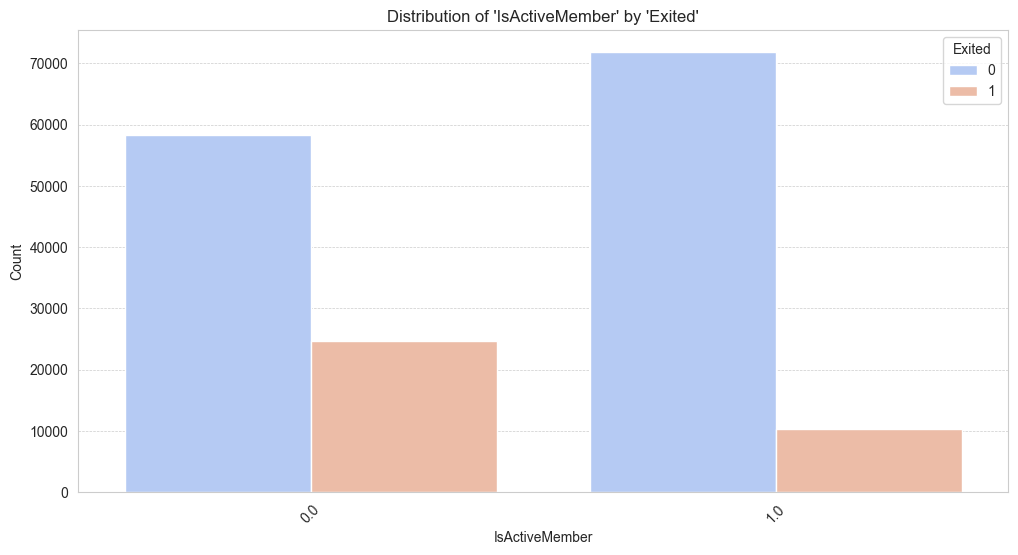

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within IsActiveMember (%),1 within IsActiveMember (%)
IsActiveMember,,,,,,
0.0,82885,50.222984,35.302423,14.920562,70.291368,29.708632
1.0,82149,49.777016,43.537695,6.239320,87.465459,12.534541


In [7]:
import analyze
for feature in categorical_features:
    display(analyze.categorical_feature(df=train, feature=feature, target=target))

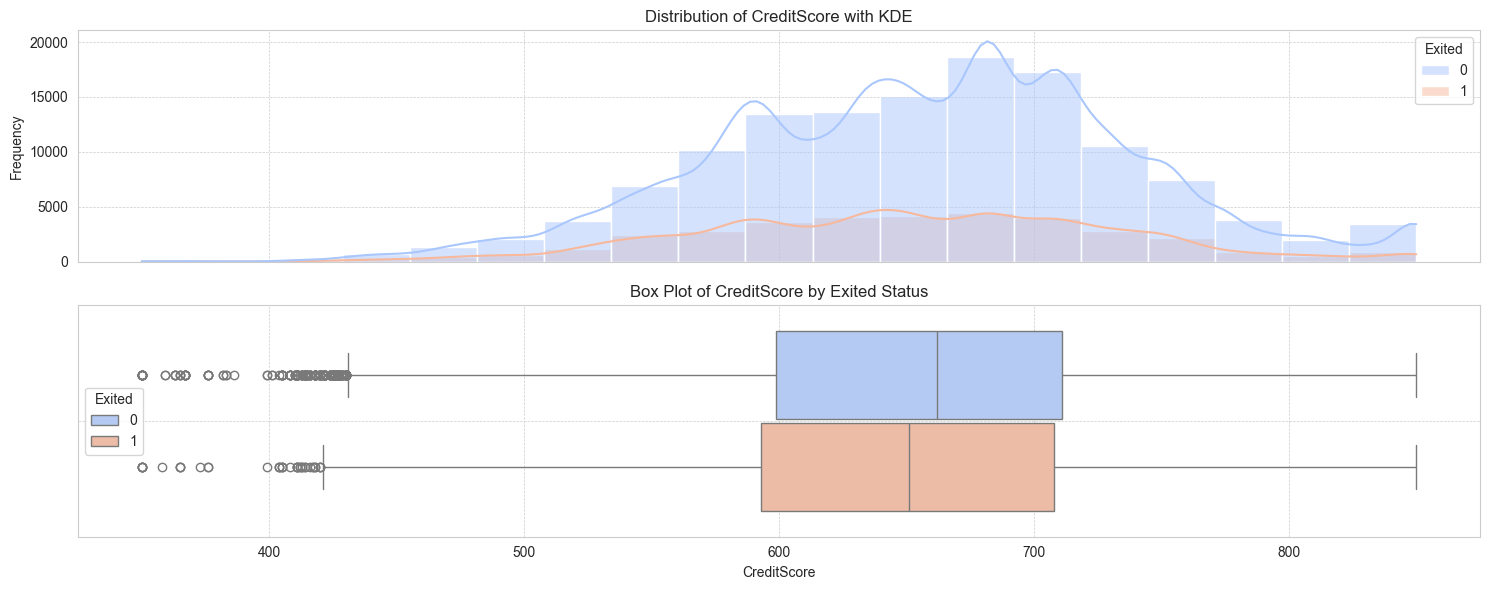

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.153302,0.153302,0.0


,count,mean,std,min,25%,50%,75%,max
CreditScore_Overall,165034.0,656.454373,80.103340,350.0,597.0,659.0,710.0,850.0
CreditScore_Lower_Outliers,253.0,405.782609,23.733394,350.0,405.0,414.0,422.0,427.0
CreditScore_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


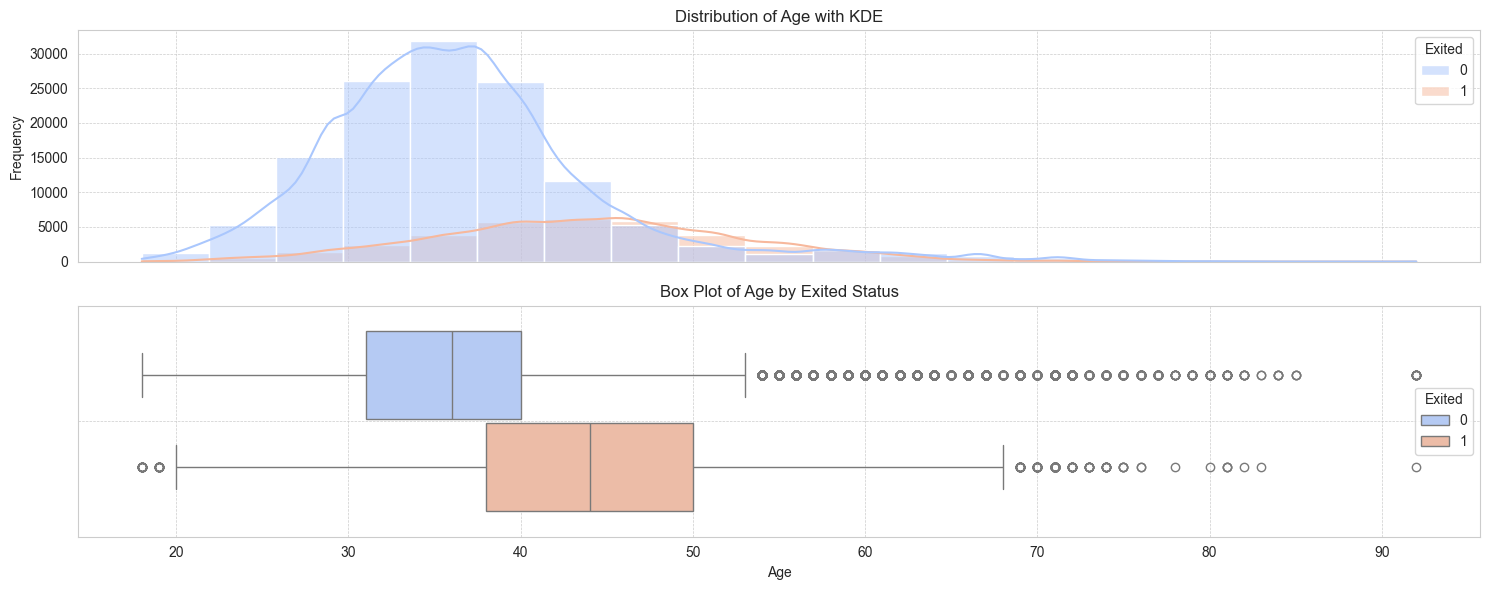

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,3.874353,0.0,3.874353


,count,mean,std,min,25%,50%,75%,max
Age_Overall,165034.0,38.125888,8.867205,18.0,32.0,37.0,42.0,92.0
Age_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_Upper_Outliers,6394.0,63.268846,4.983609,58.0,59.0,62.0,66.0,92.0


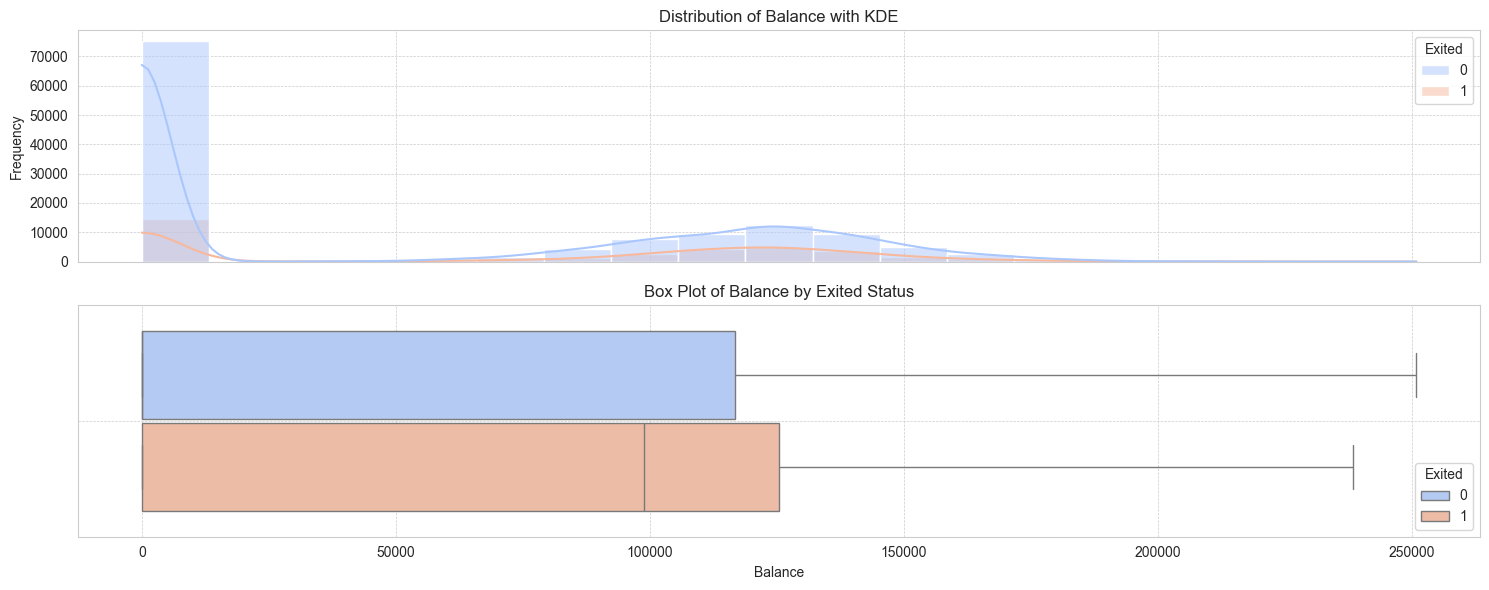

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Balance_Overall,165034.0,55478.086689,62817.663278,0.0,0.0,0.0,119939.5175,250898.09
Balance_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


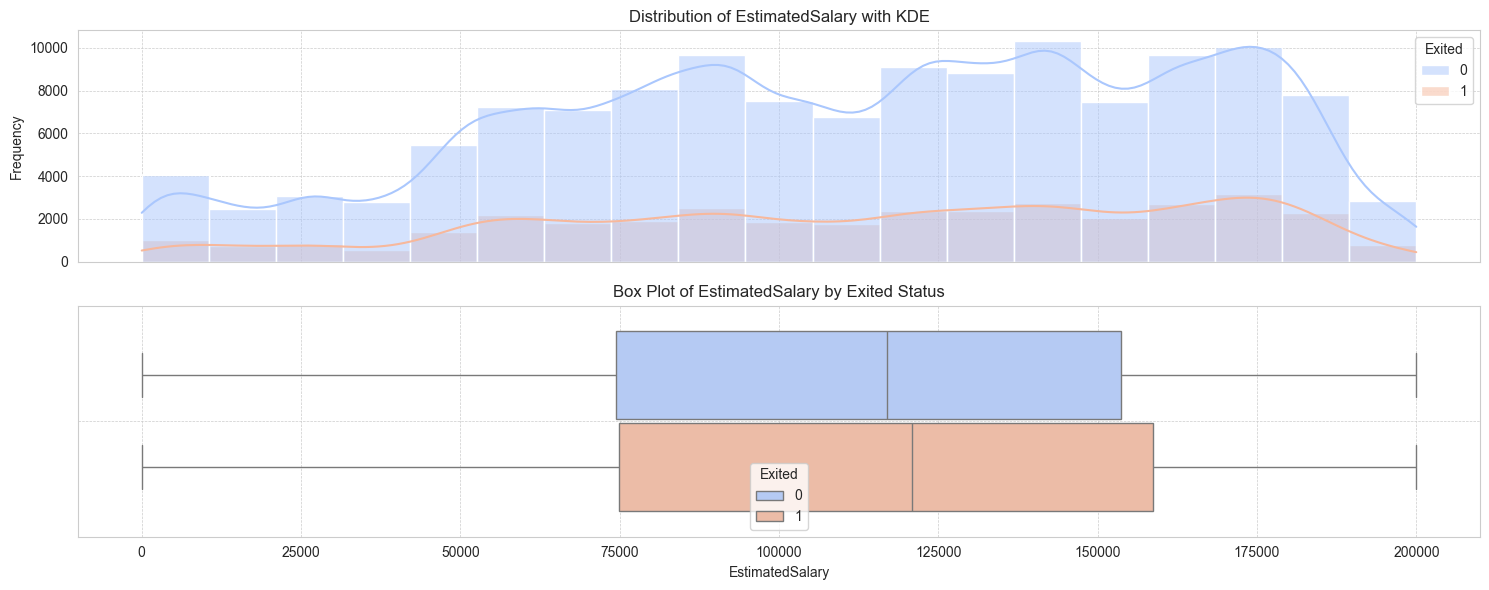

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
EstimatedSalary_Overall,165034.0,112574.822734,50292.865585,11.58,74637.57,117948.0,155152.4675,199992.48
EstimatedSalary_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedSalary_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for col in numerical_features:
    outliers, summary = analyze.numerical_feature(df=train, feature=col, target=target)
    display(outliers)
    display(summary)